In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Ler arquivo CSV
data = pd.read_csv("db_balanco_temp_geracao.csv")

# Inverter orden das colunas para ter data mais atualizada primeiro
data = data.sort_values(by='data', ascending=False)

# Criando novo dataframe somente com a coluna carga e uma segunda coluna carga-1 dia
carga = data['mean']
carga_anterior = carga.shift(-1)

data_analise = pd.DataFrame({'carga': carga, 'carga_anterior': carga_anterior})
data_analise = data_analise.dropna()
data_analise.head()
#data_analise.describe()

,carga,carga_anterior
1197,0.000000,17597.541667
1196,17597.541667,18150.958333
1195,18150.958333,17595.833333
1194,17595.833333,17602.625000
1193,17602.625000,14927.958333


In [9]:
#arredondando valor para 1100 dados
data_uso = data_analise.iloc[:1100,:]
data_uso.describe()

,carga,carga_anterior
count,1100.000000,1100.000000
mean,16747.567457,16761.092533
std,2453.485672,2401.536161
min,0.000000,3482.166667
25%,15045.708333,15045.708333
50%,16411.000000,16411.000000
75%,18138.114583,18138.114583
max,24413.708333,24413.708333


In [10]:
#Definindo variaveis x e y
x = data_uso['carga_anterior'].values
y = data_uso['carga'].values

#Transformando arrays em matrizes para passar pacotes de dados para redes recorrentes
X = x.reshape(100, -1)
Y = y.reshape(100, -1)

# Transformando dados para Z-score
scaler = MinMaxScaler()
Yscaled = scaler.fit_transform(Y)
Xscaled = scaler.fit_transform(X)
Y = Yscaled
X = Xscaled

In [69]:
# Create training and test data
train_data = X[:, :8]
test_data = X[:, 8:]

train_labels = Y[:, :8]
test_labels = Y[:, 8:]
print(train_data.shape)



# Rescale the data
scaler_data = MinMaxScaler()
scaler_labels = MinMaxScaler()

train_data = scaler_data.fit_transform(train_data)
train_labels = scaler_labels.fit_transform(train_labels)

# Assuming sequence length is 8
sequence_length = train_data.shape[1]
n_features = 1  # Each feature is treated as a separate sequence

# Reshape the input data to have the required 3 dimensions
train_data = train_data.reshape(train_data.shape[0], sequence_length, n_features)

# Build the model
model = Sequential()
model.add(LSTM(units=20, input_shape=(sequence_length, n_features)))
model.add(Dense(units=8))  # Assuming you're predicting 8 features
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model in batches of 100
batch_size = 100
num_batches = train_data.shape[0] // batch_size
for _ in range(num_batches):
    batch_start = _ * batch_size
    batch_end = (_ + 1) * batch_size
    model.fit(train_data[batch_start:batch_end], train_labels[batch_start:batch_end], epochs=500, batch_size=batch_size)

# Predict using the entire dataset (800 data points)
predicted_labels = model.predict(train_data)



(100, 8)
Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.2902
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 0.2846
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 0.2792
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2739
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2687
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2637
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2588
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2540
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2494
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2448
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2403
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2360
Epoch 13/500
1/1 [==============================] -

1/1 [==============================] - 0s 5ms/step - loss: 0.0183
Epoch 105/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0182
Epoch 106/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0181
Epoch 107/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0180
Epoch 108/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 109/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 110/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 111/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0177
Epoch 112/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0176
Epoch 113/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0175
Epoch 114/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 115/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0173
Epoch 116/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 7ms/step - loss: 0.0123
Epoch 207/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 208/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0123
Epoch 209/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 210/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 211/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 212/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 213/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0121
Epoch 214/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 215/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 216/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 217/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 218/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 309/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 310/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 311/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0103
Epoch 312/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0103
Epoch 313/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 314/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 315/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 316/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 317/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 318/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 319/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 320/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 411/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 412/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 413/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 414/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 415/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 416/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 417/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 418/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 419/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 420/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 421/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 422/500
1/1 [==============================] - 0

R-squared value: 0.8959109171231987


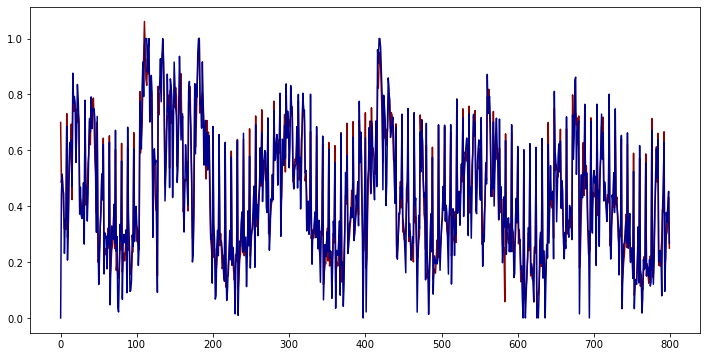

In [70]:
def rsq(y_actual, y_predict):
    return np.corrcoef(y_actual, y_predict)[0, 1] ** 2

rsq_value = rsq(Yreal.flatten(), Ytrain.flatten())
print("R-squared value:", rsq_value)

import matplotlib.pyplot as plt

# Plot the errors over epochs
plt.figure(figsize=(12, 6))
plt.plot(Ytrain.flatten(), color='darkred')
plt.plot(Yreal.flatten(), color='darkblue')
plt.show()

In [68]:
# Inverse transform to get the actual predicted values
predicted_labels = scaler_labels.inverse_transform(predicted_labels)

# Inverse transform the original labels
original_labels = scaler_labels.inverse_transform(train_labels)

# Print the original and predicted labels for comparison
print("Original Labels:")
print(original_labels)
print("Predicted Labels:")
print(predicted_labels)

Original Labels:
[[0.         0.44286505 0.5133359  0.46098168 0.44584434 0.23101402
  0.3474369  0.36008168]
 [0.68590811 0.20719051 0.32082475 0.54627527 0.62861581 0.60297858
  0.63759188 0.4703215 ]
 [0.87611909 0.76937122 0.79293419 0.76719483 0.55645487 0.64658949
  0.83571338 0.78573589]
 [0.6993239  0.37169031 0.46824944 0.36744977 0.35601989 0.38659496
  0.48399068 0.26452469]
 [0.77926626 0.47501266 0.4587365  0.34690846 0.44232173 0.61590257
  0.71412056 0.66484578]
 [0.79131355 0.67745583 0.75029635 0.74088557 0.74837269 0.70582413
  0.48206498 0.30635924]
 [0.72136488 0.31485183 0.11973047 0.21327157 0.32519807 0.39862494
  0.51582803 0.4226152 ]
 [0.6207819  0.15743573 0.30481426 0.28558161 0.29262467 0.17574207
  0.29883945 0.26501973]
 [0.62890962 0.04710035 0.22036837 0.32913834 0.31609057 0.28216362
  0.40698657 0.26654611]
 [0.67188333 0.23789703 0.2915969  0.04105252 0.02141526 0.15563416
  0.33555091 0.2742124 ]
 [0.5618484  0.06664337 0.26158371 0.29930965 0.27002

In [59]:
test_data_reshaped = test_data.reshape(test_data.shape[0], sequence_lengtht, n_featurest)

sequence_lengtht = 3
n_featurest = 1

# Assuming you have a Sequential model initialized
model = Sequential()

# Add an LSTM layer with input shape (sequence_lengtht, n_featurest)
model.add(LSTM(units=20, input_shape=(sequence_lengtht, n_featurest)))

# Add the output layer to match the desired output shape (100, 3)
model.add(Dense(units=3))  # Assuming you have 3 features in your test data

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming you have a history object returned from model.fit()
history = model.fit(test_data_reshaped, Ytest, epochs=1000, batch_size=batch_size)

Ypredicted = model.predict(test_data_reshaped)
print (Ypredicted.shape)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2852
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2801
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2751
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2702
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2654
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2607
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2560
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2515
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2470
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2426
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2382
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2339
Epoch 13/1000
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.0137
Epoch 104/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 105/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136
Epoch 106/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 107/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 108/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 109/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 110/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 111/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 112/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0130
Epoch 113/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 114/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 205/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 206/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 207/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 208/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 209/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 210/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 211/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 212/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 213/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 214/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 215/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 306/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 307/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 308/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 309/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 310/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 311/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 312/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 313/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 314/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 315/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 316/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 317/1000
1/1 [======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 407/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 408/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 409/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 410/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 411/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 412/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 413/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 414/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 415/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 416/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 417/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 418/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 508/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 509/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 510/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 511/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 512/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 513/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 514/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 515/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 516/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 517/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 518/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 609/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 610/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 611/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 612/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 613/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 614/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 615/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 616/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 617/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 618/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 619/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 620/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 710/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 711/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 712/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 713/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 714/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 715/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 716/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 717/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 718/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 719/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 720/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 721/1000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 811/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 812/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 813/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 814/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 815/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 816/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 817/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 818/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 819/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 820/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 821/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 822/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 912/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 913/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 914/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 915/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 916/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 917/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 918/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 919/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 920/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 921/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 922/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 923/1000
1/1 [=======================

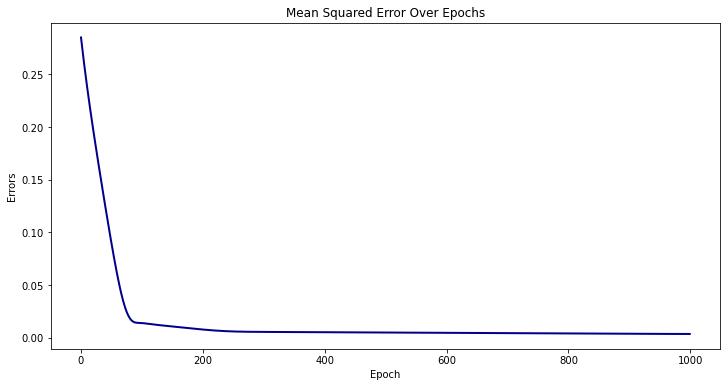

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Get the mean squared error (loss) values from the history object
errors = history.history['loss']

# Plot the errors over epochs
plt.figure(figsize=(12, 6))
plt.plot(errors, color='darkblue', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.title('Mean Squared Error Over Epochs')
plt.show()


R-squared value (test): 0.92705576616358
Mean test value: 0.45408978175867676
Mean predicted value: 0.45417506


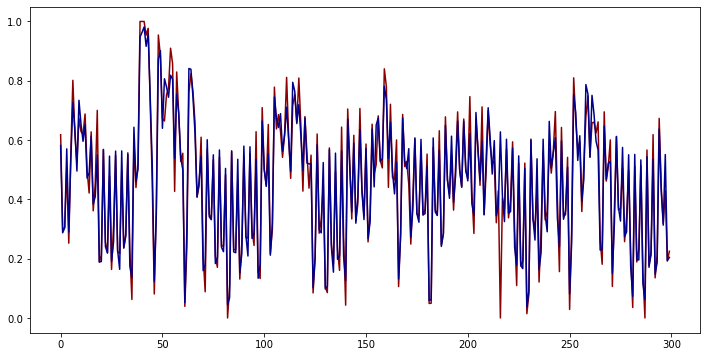

In [64]:
result_data = pd.DataFrame({'Ytest': Ytest.flatten(), 'Ypredicted': Ypredicted.flatten()})
rsq_test = rsq(result_data['Ytest'], result_data['Ypredicted'])
print("R-squared value (test):", rsq_test)

mean_test = np.mean(result_data['Ytest'])
mean_predicted = np.mean(result_data['Ypredicted'])
print("Mean test value:", mean_test)
print("Mean predicted value:", mean_predicted)

# Create a plot
plt.figure(figsize=(12, 6))

plt.plot(Ytest.flatten(), color='darkred')
plt.plot(Ypredicted.flatten(), color='darkblue')
plt.show()

In [89]:

# Predict using the scaled test data
Ypredicted_scaled = model.predict(test_data)

# Inverse transform the scaled test labels and predicted values
Ytest_original = scaler_labels.inverse_transform(test_labels)
Ypredicted_original = scaler_labels.inverse_transform(Ypredicted_scaled)

# Calculate R-squared value and other metrics
rsq_test = rsq(Ytest_original, Ypredicted_original)
mean_test = np.mean(Ytest_original)
mean_predicted = np.mean(Ypredicted_original)

# Create plots
plt.plot(Ytest_original.flatten(), color='darkred', label='Ytest')
plt.plot(Ypredicted_original.flatten(), color='darkblue', label='Ypredicted')
plt.legend()
plt.show()
# Create a plot
#plt.figure(figsize=(12, 6))


TypeError: in user code:

    File "C:\Users\Raimundo\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Raimundo\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Raimundo\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Raimundo\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\Raimundo\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Raimundo\AppData\Roaming\Python\Python38\site-packages\keras\layers\rnn\lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_17' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_17' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None
